/var/folders/hj/hs0q6d0j34175v0g8wpjxfkr0000gn/T/ipykernel_11291/3579787998.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  quali_data['quali_classification_time_ms'].fillna(


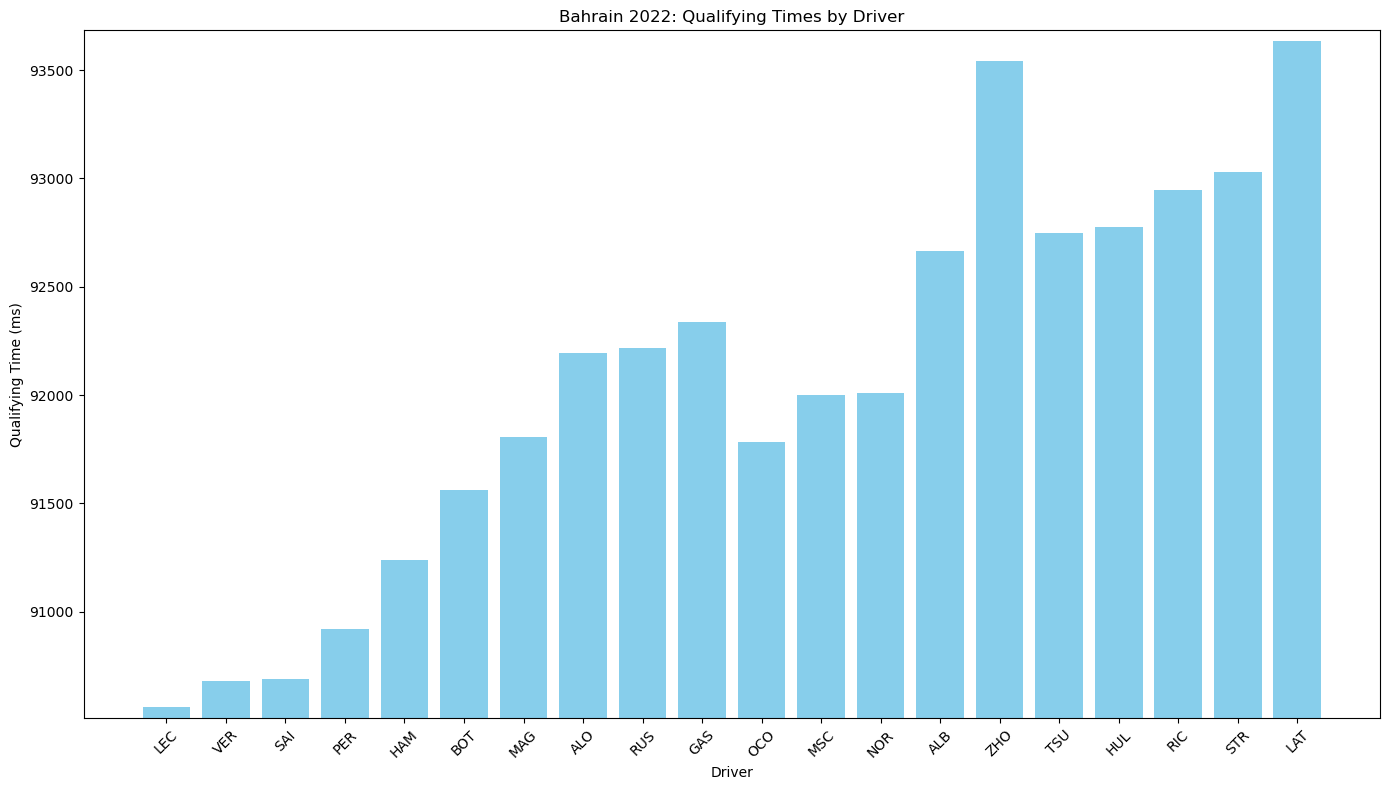

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#load
quali_data = pd.read_csv("quali_2022_to_2025_data.csv")

#replace inf with NaN
quali_data = quali_data.replace([np.inf, -np.inf], np.nan)

#impute NaN data
quali_data['quali_classification_time_ms'].fillna(
    quali_data['quali_classification_time_ms'].mean(), inplace=True
)

bahrain_2022 = quali_data[
    (quali_data['year'] == 2022) & 
    (quali_data['circuit_name'] == 'Bahrain International Circuit')
]


plt.figure(figsize=(14, 8))
plt.bar(
    bahrain_2022['driver_code'], 
    bahrain_2022['quali_classification_time_ms'], 
    color='skyblue'
)
plt.title('Bahrain 2022: Qualifying Times by Driver')
plt.xlabel('Driver')
plt.ylabel('Qualifying Time (ms)')

y_min = bahrain_2022['quali_classification_time_ms'].min() - 50
y_max = bahrain_2022['quali_classification_time_ms'].max() + 50
plt.ylim(y_min, y_max)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


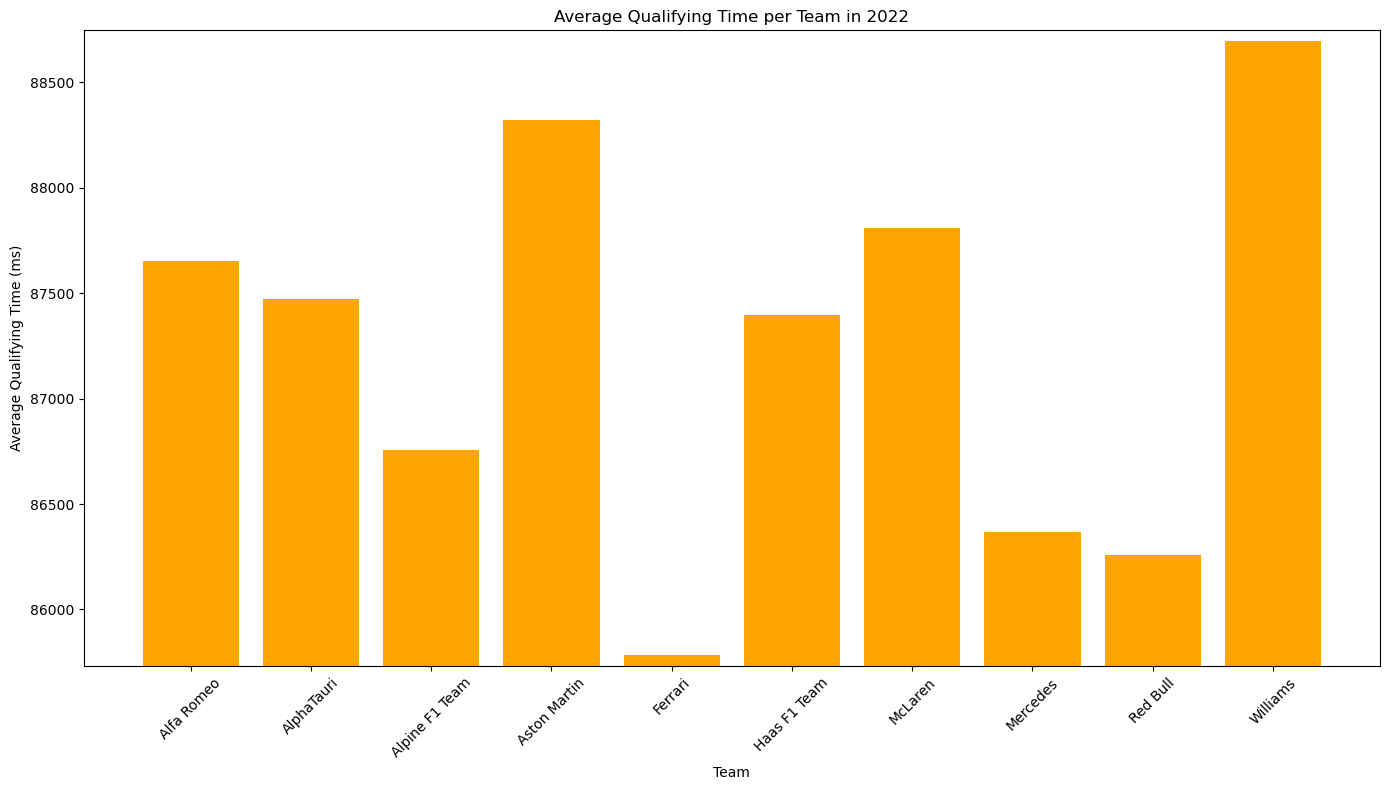

In [13]:
avg_team_2022 = (
    quali_data[quali_data['year'] == 2022]
    .groupby('team_name')['quali_classification_time_ms']
    .mean()
)

plt.figure(figsize=(14, 8))
plt.bar(
    avg_team_2022.index, 
    avg_team_2022.values, 
    color='orange'
)
plt.title('Average Qualifying Time per Team in 2022')
plt.xlabel('Team')
plt.ylabel('Average Qualifying Time (ms)')

y_min = avg_team_2022.min() - 50
y_max = avg_team_2022.max() + 50
plt.ylim(y_min, y_max)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()